In [1]:
import numpy as np
from numpy.random import randint, rand
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

In [2]:
K = 3
N = 10

In [10]:
def show_figure(mu, cls):
    fig = plt.figure()
    for c in range(K):
        subplot = fig.add_subplot(K, 7, c*7+1)
        subplot.set_xticks([])
        subplot.set_yticks([])
        subplot.set_title('Master')
        subplot.imshow(mu[c].reshape(28, 28), cmap=plt.cm.gray_r)
        i = 1
        for j in range(len(cls)):
            if cls[j] == c:
                subplot = fig.add_subplot(K, 7, c*7+i+1)
                subplot.set_xticks([])
                subplot.set_yticks([])
                subplot.imshow(df.loc[j].values.reshape(28, 28), cmap=plt.cm.gray_r)
                i += 1
                if i > 6:
                    break
    fig.show()

In [4]:
def bernoulli(x, mu):
    r = 1.0
    for x_i, mu_i in zip(x, mu):
        r *= mu_i if x_i == 1 else (1.0 - mu_i)
    return r

<ipython-input-11-b6031e8ca471>:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


iter_num 0


<ipython-input-11-b6031e8ca471>:47: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-10-df166c983d19>:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


iter_num 1
iter_num 2
iter_num 3
iter_num 4
iter_num 5
iter_num 6
iter_num 7
iter_num 8
iter_num 9


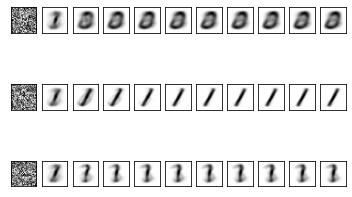

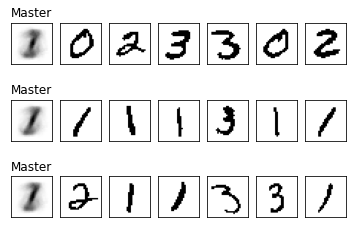

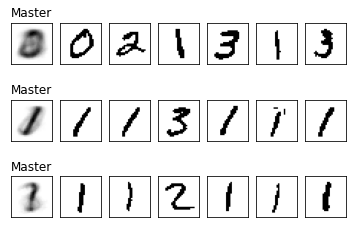

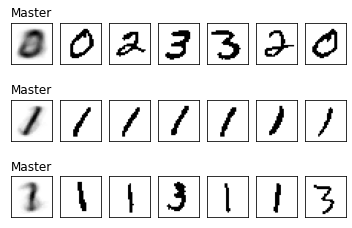

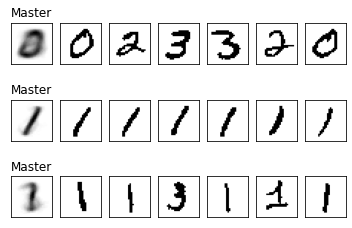

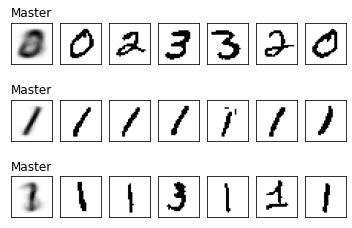

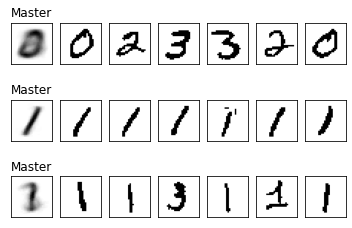

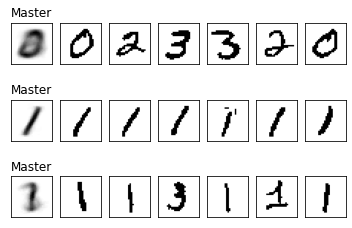

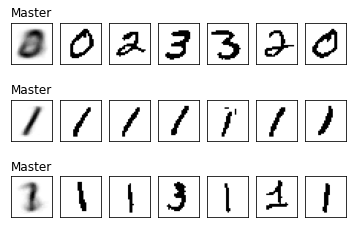

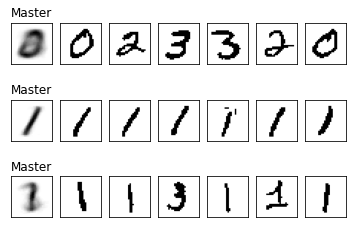

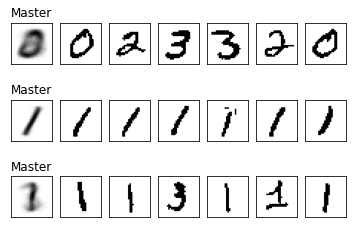

In [11]:
df = pd.read_csv('data/sample-images.txt', sep=',', header=None)
data_num = len(df)

mix = [1.0 / K]* K
mu = (rand(28 * 28 * K)* .05 + 0.25).reshape(K, 28 * 28)
for k in range(K):
    mu[k] /=mu[k].sum()

fig = plt.figure()
for k in range(K):
    subplot = fig.add_subplot(K, N+1, k*(N+1)+1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.imshow(mu[k].reshape(28, 28), cmap=plt.cm.gray_r)
fig.show()

for iter_num in range(N):
    print(f'iter_num {iter_num}')
    # E
    resp = DataFrame()
    for index, line in df.iterrows():
        tmp = []
        for k in range(K):
            a = mix[k] * bernoulli(line, mu[k])
            if a == 0:
                tmp.append(0.0)
            else:
                s = 0.0
                for kk in range(K):
                    s += mix[kk] * bernoulli(line, mu[kk])
                tmp.append(a/s)
        resp = resp.append([tmp], ignore_index=True)
    
    #M
    mu = np.zeros((K, 28*28))
    for k in range(K):
        nk = resp[k].sum()
        mix[k] = nk / data_num
        for index, line in df.iterrows():
            mu[k] += line * resp[k][index]
        mu[k] /= nk
        
        subplot = fig.add_subplot(K, N+1, k*(N+1)+(iter_num+1)+1)
        subplot.set_xticks([])
        subplot.set_yticks([])
        subplot.imshow(mu[k].reshape(28, 28), cmap=plt.cm.gray_r)
    fig.show()    

    cls = []
    for index, line in resp.iterrows():
        cls.append(np.argmax(line[0:]))
    show_figure(mu, cls)